# Predicting Revenue from Parking Citations in Baltimore
Capstone Project for Springboard Data Science Bootcamp

Tamara Monge

### Section 2: Data Exploration

In [1]:
# import libraries
import pandas as pd
import math
from datetime import datetime, date
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# plotting
import matplotlib.pyplot as plt
%matplotlib inline 
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.tile_providers import STAMEN_TONER

In [2]:
# Import cleaned data
df = pd.read_csv('persistence/cleaned_data_2018-01-03.csv', parse_dates=True, index_col='date')

24.070294347954455

18.228424538837757

11.746800426181949

count                                 623208
unique                                    26
top       ALL OTHER PARKING METER VIOLATIONS
freq                                  150008
Name: desc, dtype: object

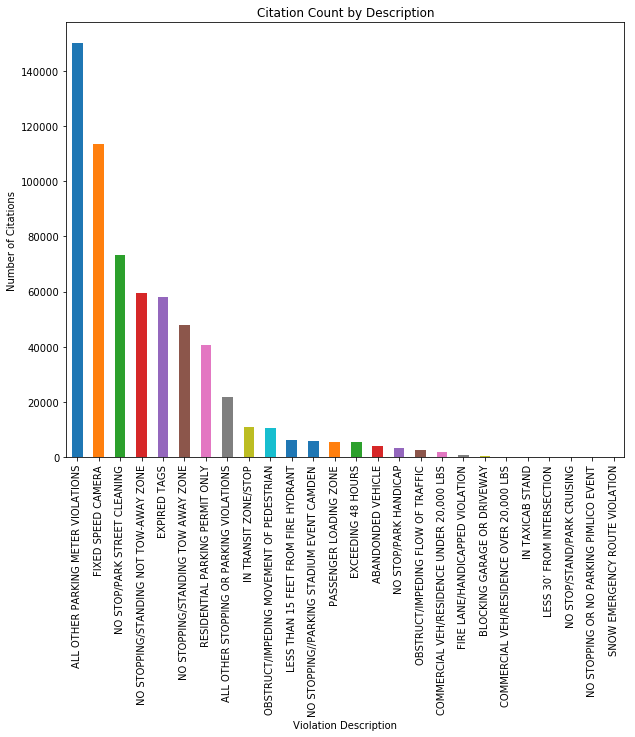

In [3]:
# explore Violations
df['desc'][df['desc'] == 'ALL OTHER PARKING METER VIOLATIONS'].count()/df['code'].count()*100 
df['desc'][df['desc'] == 'FIXED SPEED CAMERA'].count()/df['code'].count()*100  
df['desc'][df['desc'] == 'NO STOP/PARK STREET CLEANING'].count()/df['code'].count()*100  

df['desc'].describe()
fig = plt.figure(figsize=(10,8))
_ = df['desc'].sort_values().value_counts().plot(kind='bar')
_ = plt.title('Citation Count by Description')
_ = plt.xlabel('Violation Description')
_ = plt.ylabel('Number of Citations')

Findings:
- There were 26 unique violation descriptions. 
- The most common violation was "All Other Parking Meter Violations,"(24%), followed by "Fixed Speed Camera" (18%), and "No Stop/Park Street Cleaning" (12%).

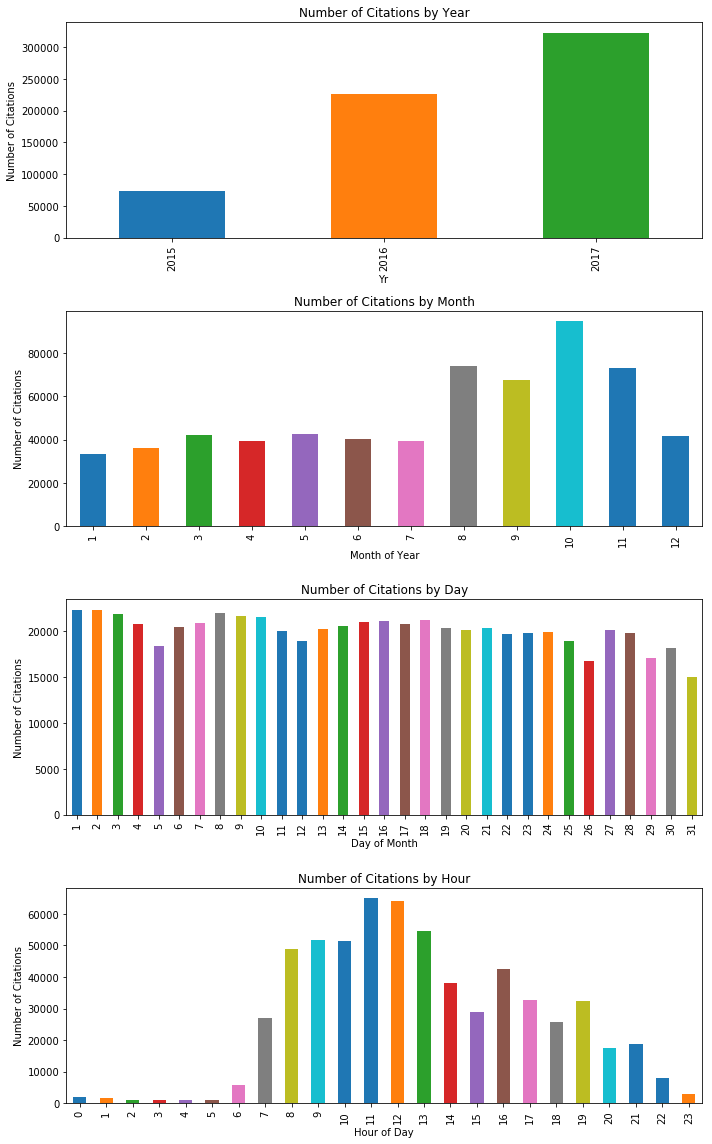

In [4]:
# explore Incidents
fig = plt.figure(figsize=(10, 16))
_ = plt.subplot(4,1,1)
_ = df['yr'].value_counts().sort_index().plot(kind='bar')
_ = plt.title('Number of Citations by Year')
_ = plt.xlabel('Yr ')
_ = plt.ylabel('Number of Citations')
_ = plt.subplot(4,1,2)
_ = df['mo'].value_counts().sort_index().plot(kind='bar')
_ = plt.title('Number of Citations by Month')
_ = plt.xlabel('Month of Year')
_ = plt.ylabel('Number of Citations')
_ = plt.subplot(4,1,3)
_ = df['day'].value_counts().sort_index().plot(kind='bar')
_ = plt.title('Number of Citations by Day')
_ = plt.xlabel('Day of Month')
_ = plt.ylabel('Number of Citations')
_ = plt.subplot(4,1,4)
_ = df['hr'].value_counts().sort_index().plot(kind='bar')
_ = plt.title('Number of Citations by Hour')
_ = plt.xlabel('Hour of Day')
_ = plt.ylabel('Number of Citations')
_ = plt.tight_layout()

Findings: 
- The month that sees the most citations is August. 
- The hour that sees the most citations is 11:00-12:00.

In [5]:
# convert longitude and latitude to Web Mercator coordinates
def to_webmercator(row):
    """Ingest longitude,latitude and return Web Mercator coordinates"""
    # Check if coordinate out of range for Latitude/Longitude
    xLon = row[0]
    yLat = row[1]
    if (abs(xLon) > 180) and (abs(yLat) > 90):
        return

    semimajorAxis = 6378137.0  # WGS84 spheriod semimajor axis
    east = xLon * 0.017453292519943295
    north = yLat * 0.017453292519943295

    northing = 3189068.5 * math.log((1.0 + math.sin(north)) / (1.0 - math.sin(north)))
    easting = semimajorAxis * east
    return [easting, northing]

In [6]:
# define new dataframe, webmercator
webmercator = df[['lon','lat']].apply(to_webmercator, axis=1)

In [8]:
# indicate citations on map of baltimore 
# lowerleftwebmerc = to_webmercator([westedge, southedge])  
# upperrightwebmerc = to_webmercator([eastedge, northedge]) 

fig = figure(tools='pan, wheel_zoom')#, x_range=(lowerleftwebmerc[0],upperrightwebmerc[0]), y_range=(lowerleftwebmerc[1],upperrightwebmerc[1]))
fig.axis.visible = False
fig.add_tile(STAMEN_TONER)
fig.circle(x=webmercator['lon'], y=webmercator['lat'], alpha=0.03, size=4)
filename = 'citation_heatmap_small_' + str(date.today()) + '.html'
filetitle = 'citation_heatmap_small_' + str(date.today()) + '.py'
output_file(filename, title=filetitle)
show(fig)

TileRenderer(id='c4c94bf2-4a76-4049-b818-ca9279cab2cc', ...)

GlyphRenderer(id='506cbd58-437f-408d-b725-2cb651a34db7', ...)

count     623208
unique       317
top          HON
freq       79268
Name: make, dtype: object

12.71934891721544

12.201383807653302

10.520725022785332

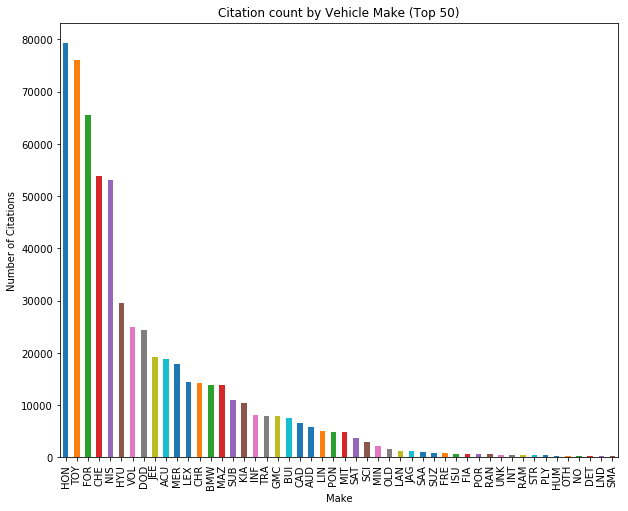

In [9]:
# explore Offenders 
df['make'].describe()  
df['make'][df['make'] == 'HON'].count()/df['make'].count()*100
df['make'][df['make'] == 'TOY'].count()/df['make'].count()*100
df['make'][df['make'] == 'FOR'].count()/df['make'].count()*100

fig = plt.figure(figsize=(10,8))
_ = df['make'].value_counts().sort_values(ascending=False).head(50).plot(kind='bar')
_ = plt.title('Citation count by Vehicle Make (Top 50)')
_ = plt.xlabel('Make')
_ = plt.ylabel('Number of Citations')

Findings:
- 317 unique car makes received citations.
- The most common make to receive citations was HONDA (12.7%), followed by TOYOTA (12.3%), and FORD (10.5%).

count     623208
unique        81
top           MD
freq      535453
Name: state, dtype: object

85.91882645922388

2.4011245041783802

2.327152411393949

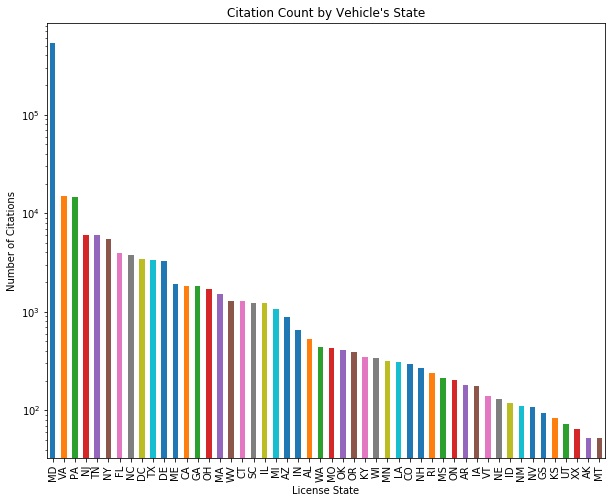

In [10]:
df['state'].describe()  
df['state'][df['state'] == 'MD'].count()/df['state'].count()*100
df['state'][df['state'] == 'VA'].count()/df['state'].count()*100
df['state'][df['state'] == 'PA'].count()/df['state'].count()*100

fig = plt.figure(figsize=(10,8))
_ = df['state'].value_counts().sort_values(ascending=False).head(50).plot(kind='bar')
_ = plt.title('Citation Count by Vehicle\'s State')
_ = plt.xlabel('License State')
_ = plt.ylabel('Number of Citations')
_ = plt.yscale('log')

Findings:
- 81 states received citations.
- Not surprisingly, the most common state to receive citations was MARYLAND (86%), followed by the nearby states of VIRGINIA (2.4%), and PENNSYLVANIA (2.3%). 

count    623208.000000
mean         46.957209
std          44.660143
min          23.000000
25%          32.000000
50%          40.000000
75%          52.000000
max         502.000000
Name: fine, dtype: float64

48.275375155646266

66.5086134966175

97.017368198097586

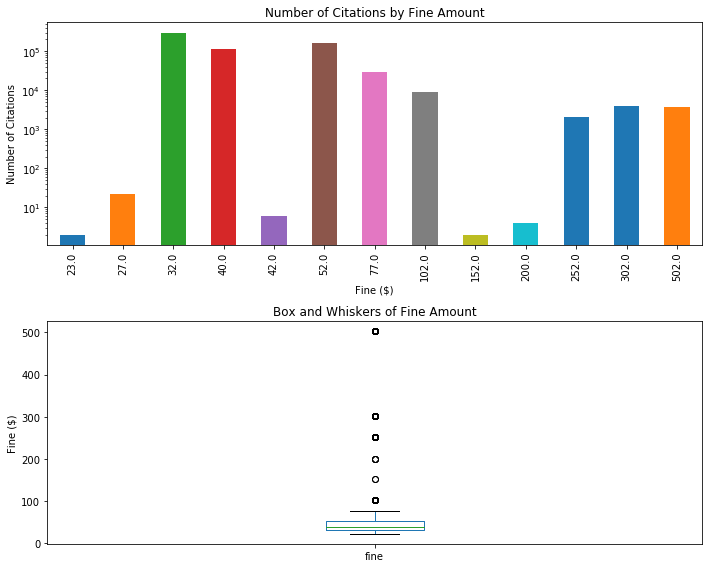

In [11]:
# explore Account status
df['fine'].describe()
df['fine'][df['fine'] == 32].count()/df['fine'].count()*100
df['fine'][df['fine'] < 50 ].count()/df['fine'].count()*100
df['fine'][df['fine'] < 100 ].count()/df['fine'].count()*100

fig = plt.figure(figsize=(10, 8))
_ = plt.subplot(2,1,1)
_ = df['fine'].value_counts().sort_index().plot(kind='bar')
_ = plt.title('Number of Citations by Fine Amount')
_ = plt.xlabel('Fine ($)')
_ = plt.ylabel('Number of Citations')
_ = plt.yscale('log')
_ = plt.subplot(2,1,2)
_ = df['fine'].plot(kind='box')
_ = plt.title('Box and Whiskers of Fine Amount')
_ = plt.ylabel('Fine ($)')
_ = plt.tight_layout()

Findings:
- The minimum fine is \$23 and the maximum fine is \$502.
- The most common fine amount is \$32 (48%).
- 66% of fines are less than \$50.
- 97% of fines are less than \$100. 

count    623208.000000
mean         31.435570
std          75.974096
min           0.000000
25%           0.000000
50%           0.000000
75%          40.000000
max         954.000000
Name: bal, dtype: float64

67.175004171961845

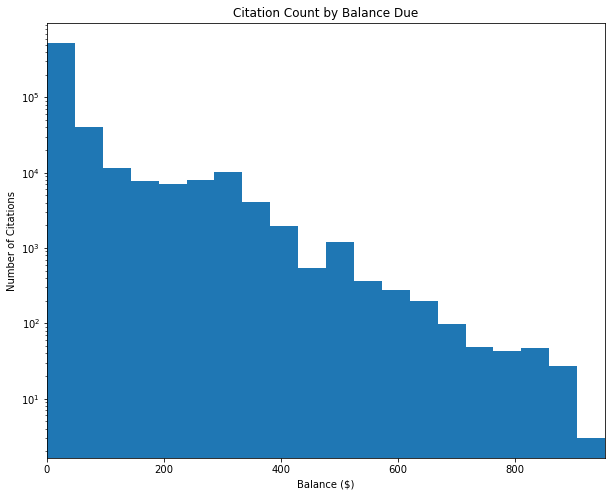

In [12]:
df['bal'].describe()
df['bal'][df['bal'] == 0].count()/df['bal'].count()*100

fig = plt.figure(figsize=(10, 8))
_ = plt.hist(df['bal'], bins=20)
_ = plt.title('Citation Count by Balance Due')
_ = plt.xlabel('Balance ($)')
_ = plt.ylabel('Number of Citations')
_ = plt.yscale('log')
_ = plt.xlim([0, 954])

Findings:
- The minimum balance is \$0 and the maximum balance is \$954.
- 67% of balances are \$0. In other words, 67% of the accounts have been paid off.

count    623208.000000
mean         26.337853
std          45.793413
min           0.000000
25%           0.000000
50%          32.000000
75%          32.000000
max         502.000000
Name: ofine, dtype: float64

47.204785561160961

77.954390829386014

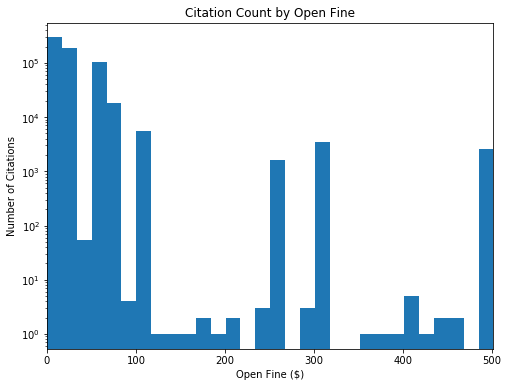

In [13]:
df['ofine'].describe()
df['ofine'][df['ofine'] == 0].count()/df['ofine'].count()*100
df['ofine'][df['ofine'] <= 32].count()/df['ofine'].count()*100

fig = plt.figure(figsize=(8, 6))
_ = plt.hist(df['ofine'], bins=30)
_ = plt.title('Citation Count by Open Fine')
_ = plt.xlabel('Open Fine ($)')
_ = plt.ylabel('Number of Citations')
_ = plt.yscale('log')
_ = plt.xlim([0, 502])

Findings:
- The minimum open fine is \$0 and the maximum open fine is \$502. Since the maximum open fine is the same as the maximum fine, it seems reasonable to conclude that the account that received the citation for \$502 received just that one violation in the time period of the dataset.
- 47% of open fines are \$0, meaning the accounts have been paid off. 

count    623208.000000
mean          4.930153
std          23.613409
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         300.000000
Name: openalty, dtype: float64

94.06811209098727

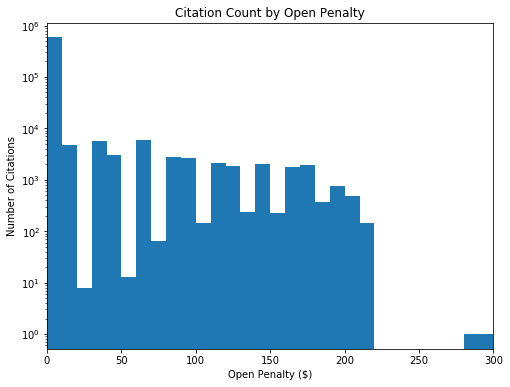

In [14]:
df['openalty'].describe()
df['openalty'][df['openalty'] == 0].count()/df['openalty'].count()*100
fig = plt.figure(figsize=(8, 6))
_ = plt.hist(df['openalty'], bins=30)
_ = plt.title('Citation Count by Open Penalty')
_ = plt.xlabel('Open Penalty ($)')
_ = plt.ylabel('Number of Citations')
_ = plt.yscale('log')
_ = plt.xlim([0, 300])

Findings: 
- The maximum open penalty is \$300. 
- 94% of open penalties are \$0, which suggests that these accounts were either paid on time and did not incur penalties or they have already paid off their penalties.

The average daily volume of citations is:  780
The average weekly volume of citations is:  5419
The average monthly volume of citations is:  23082
The average annual volume of citations is:  207736


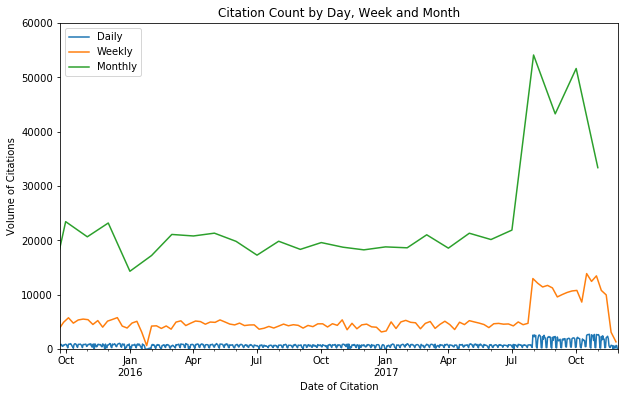

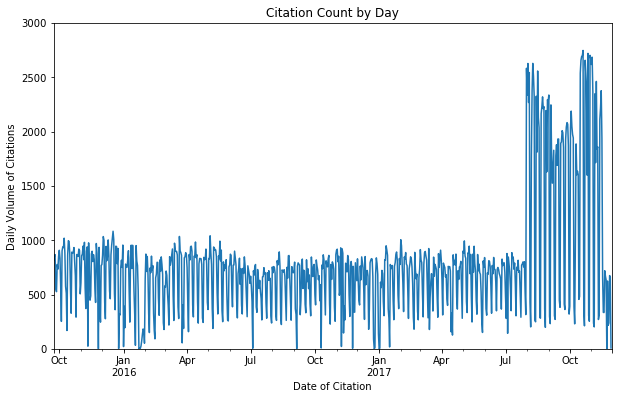

In [15]:
# explore Citations over time
#Volume of citations per day, per month, per yearfig = plt.figure(figsize=(8, 6))
fig = plt.figure(figsize=(10, 6))
_ = df['cit'].resample('D').count().plot()
_ = df['cit'].resample('W').count().plot()
_ = df['cit'].resample('M').count().plot()
_ = plt.title('Citation Count by Day, Week and Month')
_ = plt.xlabel('Date of Citation')
_ = plt.ylabel('Volume of Citations')
_ = plt.legend(['Daily', 'Weekly', 'Monthly'])
_ = plt.xlim(['2015-09-23', '2017-11-30'])
_ = plt.ylim([0, 60000])

fig = plt.figure(figsize=(10, 6))
_ = df['cit'].resample('D').count().plot()
_ = plt.title('Citation Count by Day')
_ = plt.xlabel('Date of Citation')
_ = plt.ylabel('Daily Volume of Citations')
_ = plt.xlim(['2015-09-23', '2017-11-30'])
_ = plt.ylim([0, 3000])

print('The average daily volume of citations is: ',round(df['cit'].resample('D').count().mean()))
print('The average weekly volume of citations is: ',round(df['cit'].resample('W').count().mean()))
print('The average monthly volume of citations is: ',round(df['cit'].resample('M').count().mean()))
print('The average annual volume of citations is: ',round(df['cit'].resample('A').count().mean()))


Findings:
- The average daily volume of citations is: 780. 
- The average weekly volume of citations is: 5419.
- The average monthly volume of citations is: 23,082.
- The average annual volume of citations is: 207,736

- The surge in citations in July 2017 is likely due to the City's fiscal year ending on June 30th. 

36672
254471
1083856
9754703


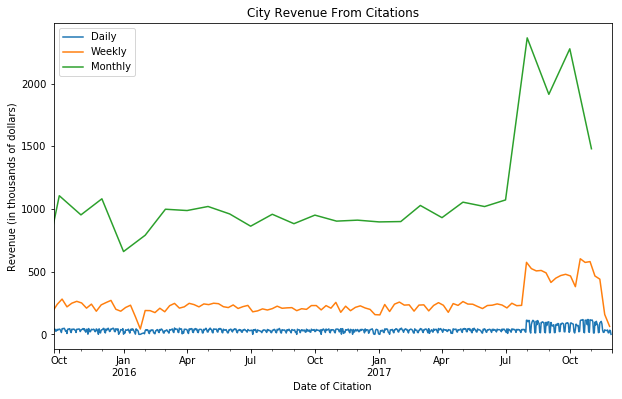

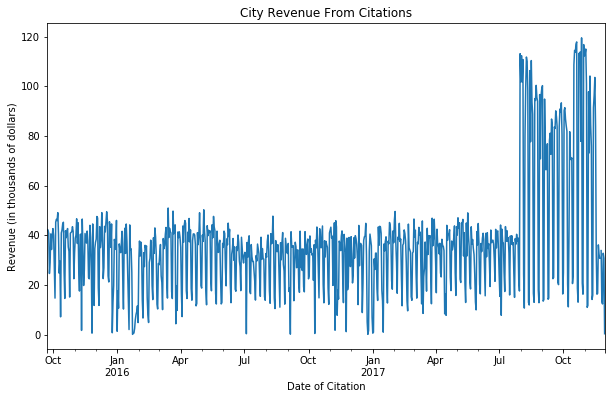

In [16]:
# explore Revenue over Time
fig = plt.figure(figsize=(10, 6))
_ = (df['fine']/1000).resample('D').sum().plot()
_ = (df['fine']/1000).resample('W').sum().plot()
_ = (df['fine']/1000).resample('M').sum().plot()
_ = plt.title('City Revenue From Citations')
_ = plt.xlabel('Date of Citation')
_ = plt.ylabel('Revenue (in thousands of dollars)')
_ = plt.legend(['Daily', 'Weekly', 'Monthly'])
_ = plt.xlim(['2015-09-23', '2017-11-30'])

print(round(df['fine'].resample('D').sum().mean()))
print(round(df['fine'].resample('W').sum().mean()))
print(round(df['fine'].resample('M').sum().mean()))
print(round(df['fine'].resample('A').sum().mean()))

fig = plt.figure(figsize=(10, 6))
_ = (df['fine']/1000).resample('D').sum().plot()
_ = plt.title('City Revenue From Citations')
_ = plt.xlabel('Date of Citation')
_ = plt.ylabel('Revenue (in thousands of dollars)')
_ = plt.xlim(['2015-09-23', '2017-11-30'])

Findings:
- The average daily revenue from citations is: \$36,672.
- The average weekly revenue from citations is: \$254,471.
- The average monthly revenue from citations is: \$1.1 M.
- The average annual revenue from citations is: \$9.75 M.



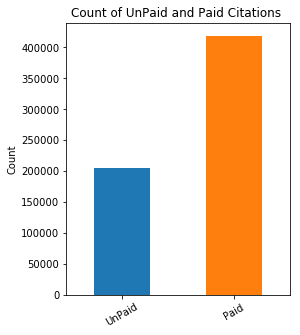

In [17]:
# How many citations are paid? 
_ = df['paid'].value_counts(ascending=True).plot(kind='bar', figsize=(4,5))
_ = plt.title('Count of UnPaid and Paid Citations ')
_ = plt.xticks([0,1], ['UnPaid', 'Paid'], rotation=30)
_ = plt.ylabel('Count')

In [18]:
print(round(100*df['paid'].sum()/len(df['paid'])),'% of accounts have been paid down.')

67.0 % of accounts have been paid down.
